In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

epoch 50, x1: 0.160304, x2: -0.112400


d:\Anaconda3\envs\d2l\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


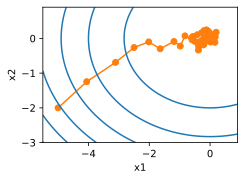

In [8]:
def f(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):
    return 2 * x1, 4 * x2

def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    g1 += torch.normal(0., 1, (1,))
    g2 += torch.normal(0., 1, (1,))
    eta_t = eta * lr
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

def constant_lr():
    return 1

eta = .1
lr = constant_lr()
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

epoch 1000, x1: -0.120271, x2: 0.077047


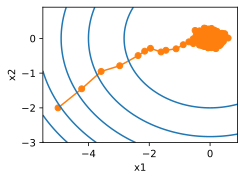

In [10]:
def exponential_lr():
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr()
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: -0.189109, x2: -0.171641


d:\Anaconda3\envs\d2l\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


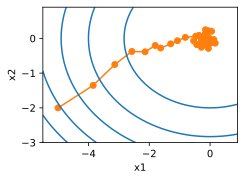

In [12]:
def poly_lr():
    global t
    t += 1
    return 1 / math.sqrt(1 + 0.1 * t)

t = 1
lr = poly_lr()
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))